<a href="https://colab.research.google.com/github/Tmitchy/Data-Analytics-and-Machine-learning/blob/main/CT5018_FHM_SEM1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

missing_Values= ["N/a","na","--", "??"]
df= pd.read_csv("/content/Tabular_DS_Jobs-checkpoint.csv",encoding= "latin1", na_values=missing_Values)
print(df.columns) # Get the Columns Names

df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.isna().any().any()
(df.isna().sum() / len(df)) * 100





Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')


,0
Job Title,0.000000
Salary Estimate,0.000000
Job Description,0.000000
Rating,0.000000
Company Name,0.000000
Location,0.000000
Headquarters,0.000000
Size,0.000000
Type of ownership,0.000000
Industry,0.000000


In [ ]:
import pandas as pd
import numpy as np

df= pd.read_csv("/content/Tabular_DS_Jobs-checkpoint.csv",encoding= "latin1")

#Count and Drop Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df['Hq_State'] = df['Headquarters'].str.extract(r',\s*([A-Z]{2})')

# Fix: Identify columns to drop using the current single-level column names, then drop them.
cols_to_drop_list = ["Job Description", "Sector", "Revenue", "job_simp","Headquarters"]
# Filter to ensure only existing columns are dropped to prevent KeyError
existing_cols_to_drop = [col for col in cols_to_drop_list if col in df.columns]
if existing_cols_to_drop: # Only attempt to drop if there are columns to drop
    df.drop(columns=existing_cols_to_drop, inplace=True)


# Create numbered multi-index for columns
numbering_row = list(range(len(df.columns)))
df.columns = pd.MultiIndex.from_tuples(zip(numbering_row, df.columns))


# Renaming the Head Columns
new_name= {"min_salary": "Min_Salary", "max_salary": "Max_Salary", "avg_salary": "Avg_Salary",
           "job_state": "Job_State", "same_state": "Same_State", "company_age": "Company_Age",
           "python": "Python", "excel": "Excel", "hadoop": "Hadoop", "spark": "Spark",
           "aws": "Aws", "tableau": "Tableau", "big_data": "Big_Data", "job_simp": "Job_Simp",
           "Type of ownership":"Type_Of_Ownership", "Company Name": "Company_Name", 'Job Title':'Job_Title',
           'Salary Estimate':'Salary_Estimate', "seniority":"Seniority"}
df.rename(columns=new_name, level=1, inplace=True)

# Cleaning missing values and Columns
missing_Values= ["N/a","na","--", "?", "Unknown", "-1"]
df = df.replace(missing_Values, np.nan)


# Save cleaned data
df.to_csv("Tabular_DS_Jobs-checkpoint_cleaned.csv", mode='w', index=False, header=True, encoding="latin1")

# Print DataFrame preview
print(df.head())

                  0               1      2                   3   \
           Job_Title Salary_Estimate Rating        Company_Name   
0  Sr Data Scientist        137-171     3.1         Healthfirst   
1     Data Scientist        137-171     4.2             ManTech   
2     Data Scientist        137-171     3.8      Analysis Group   
3     Data Scientist        137-171     3.5             INFICON   
4     Data Scientist        137-171     2.9  Affinity Solutions   

              4                        5                        6   \
        Location                     Size        Type_Of_Ownership   
0   New York, NY   1001 to 5000 employees   Nonprofit Organization   
1  Chantilly, VA  5001 to 10000 employees         Company - Public   
2     Boston, MA   1001 to 5000 employees  Private Practice / Firm   
3     Newton, MA    501 to 1000 employees         Company - Public   
4   New York, NY      51 to 200 employees        Company - Private   

                                      7

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Access 'Avg_salary' using its MultiIndex key and print its mean, mode, median, and std.
print(f"Mode of Avg_Salary: {df[(10,"Avg_Salary")].mode()}")
print(f"Median of Avg_Salary: {df[(10,"Avg_Salary")].median()}")
print(f"Mean of Avg_Salary: {df[(10, 'Avg_Salary')].mean()}")
print(f"Standard Deviation of Avg_Salary: {df[(10, 'Avg_Salary')].std()}")

Mode of Avg_Salary: 0    92
Name: (10, Avg_Salary), dtype: int64
Median of Avg_Salary: 114.0
Mean of Avg_Salary: 123.67901234567901
Standard Deviation of Avg_Salary: 40.1023272780877


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

plt.hist(df[(2,'Rating')], bins=20)   # adjust bins if needed

plt.xlabel("Company Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Company Ratings")

plt.tight_layout()
plt.show()



NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

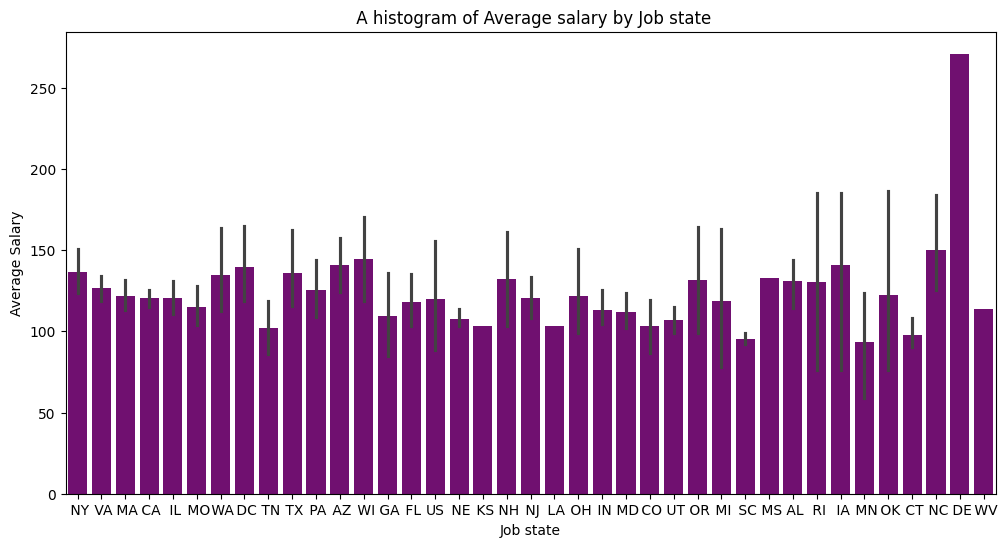

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




if (11, "Job_State") in df.columns:
    plt.figure(figsize=(12, 6))  # increase width and height
    sns.barplot(x=df[(11, "Job_State")], y=df[(10,"Avg_Salary")], color= "purple")
    plt.title(" A histogram of Average salary by Job state")
    plt.xlabel("Job state")
    plt.ylabel("Average Salary")
    plt.show()
else:
    print("Required columns for plotting were not found in the DataFrame.")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

# Group 1: job in same state as HQ (using the existing 'Same_State' column)
group_same = df[df[(12,'Same_State')] == 1][(10,'Avg_Salary')]
print("Group 1 (Same State - Avg_Salary):")
print(group_same.head())

# Group 2: job in different state than HQ (using the existing 'Same_State' column)
group_diff = df[df[(12,'Same_State')] == 0][(10,'Avg_Salary')]
print("\nGroup 2 (Different State - Avg_Salary):")
print(group_diff.head())

mean1 = group_same.mean()
mean2 = group_diff.mean()
print(f"\nMean of Group 1 (Same State): {mean1}")
print(f"Mean of Group 2 (Different State): {mean2}")

var1 = group_same.var(ddof=1)
var2 = group_diff.var(ddof=1)
print(f"Standard Deviation of Avg_Salary for Group 1: {group_same.std()}")
print(f"Standard Deviation of Avg_Salary for Group 2: {group_diff.std()}")
print(f"Variance of Group 1: {var1}")
print(f"Variance of Group 2: {var2}")

n1 = group_same.shape[0]
n2 = group_diff.shape[0]
print(f"Sample size of Group 1: {n1}")
print(f"Sample size of Group 2: {n2}")

# Perform independent samples t-test
# Check if both groups have enough samples for a t-test
if n1 > 1 and n2 > 1: # t-test requires at least 2 samples per group for variance calculation
    t_statistic, p_value = stats.ttest_ind(group_same, group_diff, equal_var=False) # Welch's t-test assuming unequal variances
    print(f"\nIndependent samples t-test results:")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print(f"With p-value {p_value:.4f} < {alpha}, we reject the null hypothesis.")
        print("There is a statistically significant difference in average salaries between jobs in the same state as headquarters and those not in the same state.")
    else:
        print(f"With p-value {p_value:.4f} >= {alpha}, we fail to reject the null hypothesis.")
        print("There is no statistically significant difference in average salaries between jobs in the same state as headquarters and those not in the same state.")
elif n1 <= 1 and n2 <= 1:
    print("\nBoth groups have insufficient data (less than 2 samples) to perform a meaningful t-test.")
elif n1 <= 1:
    print("\nGroup 1 (Same State) has insufficient data (less than 2 samples) to perform a meaningful t-test.")
else:
    print("\nGroup 2 (Different State) has insufficient data (less than 2 samples) to perform a meaningful t-test.")

Group 1 (Same State - Avg_Salary):
0    154
2    154
4    154
5    154
7    154
Name: (10, Avg_Salary), dtype: int64

Group 2 (Different State - Avg_Salary):
1     154
3     154
6     154
8     154
10    154
Name: (10, Avg_Salary), dtype: int64

Mean of Group 1 (Same State): 119.31716417910448
Mean of Group 2 (Different State): 126.75526315789473
Standard Deviation of Avg_Salary for Group 1: 33.38236325063971
Standard Deviation of Avg_Salary for Group 2: 44.01571557533366
Variance of Group 1: 1114.382176197661
Variance of Group 2: 1937.3832176086698
Sample size of Group 1: 268
Sample size of Group 2: 380

Independent samples t-test results:
t-statistic: -2.444770502134761
p-value: 0.014761992427621001
With p-value 0.0148 < 0.05, we reject the null hypothesis.
There is a statistically significant difference in average salaries between jobs in the same state as headquarters and those not in the same state.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math



# The next step was to inspect if Seniority is independent of Company Type, and from the values presented, it is observed "Senior"
# is more dependent in private companies and less in Subsidiary or Business Segment but for "junior" the percentage reveals
# that it is independent in all Company type.



Table = df.groupby([(21,'Seniority'), (6,'Type_Of_Ownership')]).size().unstack(fill_value=0)

row_totals = Table.sum(axis=1)
col_totals = Table.sum(axis=0)
grand_total = Table.values.sum()


expected = pd.DataFrame(
    {
        col: (row_totals * col_totals[col]) / grand_total
        for col in Table.columns
    },
    index=Table.index
)

print(expected)


chi_square = ((Table - expected)**2 / expected).to_numpy().sum()
print(f"Chi-square value: {chi_square}")


df_value = (Table.shape[0] - 1) * (Table.shape[1] - 1)
print(f"Degrees of freedom: {df_value}")

# Using a chi-square table
# x-value: 1.155
# Using universal significance level(α) = 0.05

# So with
# Critical value = 9.488
# which means the Null hypothesis is not rejected and that seniority is independent of company type.

                 Company - Private  Company - Public  Nonprofit Organization  \
(21, Seniority)                                                                
jr                        0.466667          0.411111                0.044444   
senior                   41.533333         36.588889                3.955556   

                 Other Organization  Subsidiary or Business Segment  
(21, Seniority)                                                      
jr                         0.011111                        0.066667  
senior                     0.988889                        5.933333  
Chi-square value: 1.1556982343499194
Degrees of freedom: 4


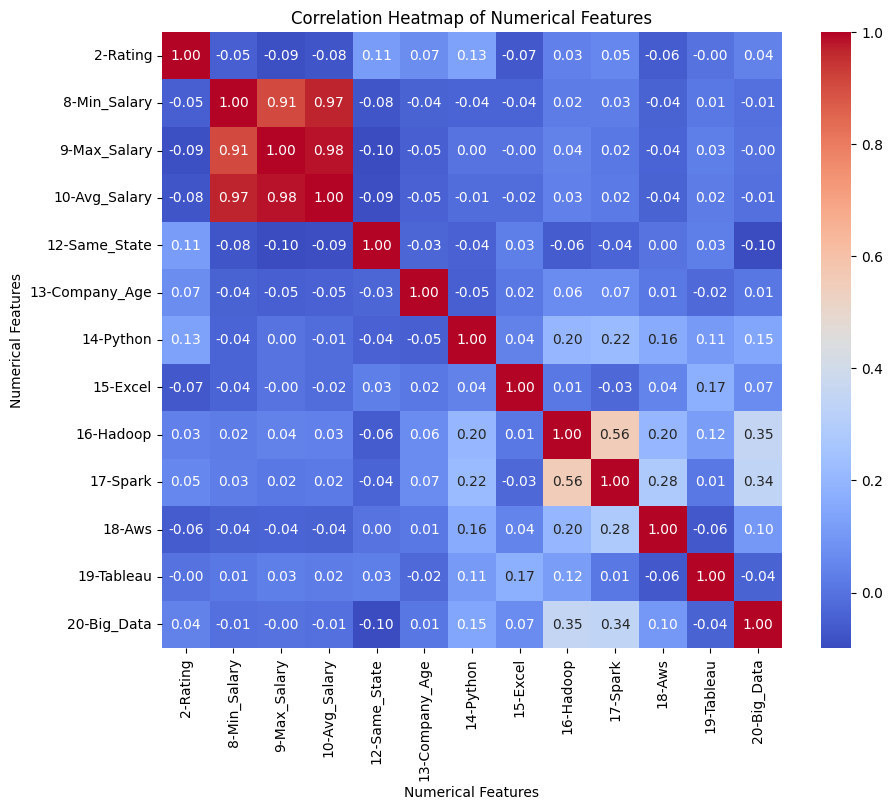

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Selecting the Numerical Features
corr = df.corr(numeric_only=True)


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")
plt.show()
# the strongest positive correlations = 1.0
# the strongest negative correlations = -0.10
# the strongest weak correlations = 0.56

0      1998
1      1973
2      1986
3      2005
4      2003
       ... 
655    1994
656    2026
657    2026
658    2026
659    1981
Name: founding_year, Length: 648, dtype: int64
    founding_year          10
                   Avg_Salary
0            1786  108.500000
1            1793  183.000000
2            1825  120.000000
3            1835  145.500000
4            1854  103.000000
..            ...         ...
98           2021  114.583333
99           2022  156.200000
100          2023  122.000000
101          2024  117.428571
102          2026  135.981308

[103 rows x 2 columns]


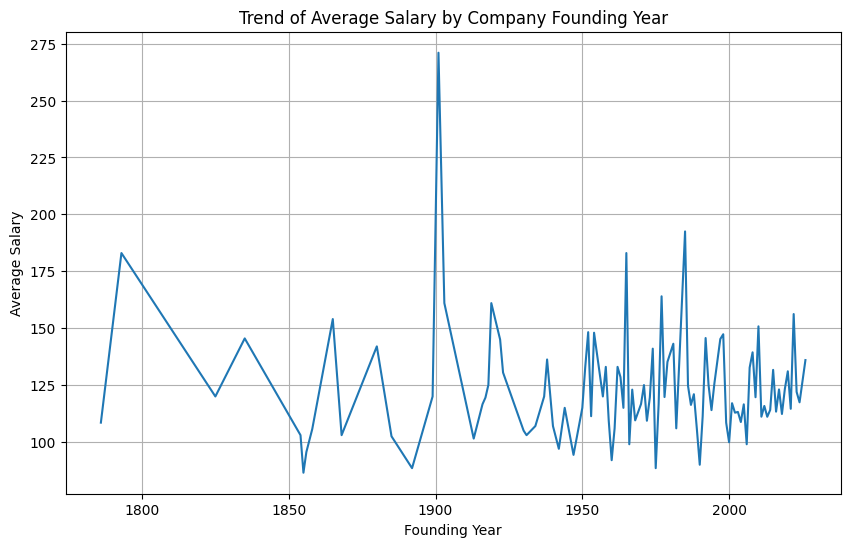

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


df['founding_year'] = 2025 - df[13,'Company_Age']
print(df["founding_year"])

# The mean salary for each founding year
salary_trend = df.groupby('founding_year')[ [(10,'Avg_Salary')] ].mean().reset_index()
print(salary_trend)


# The mean salary for each founding year
plt.figure(figsize=(10,6))
plt.plot(salary_trend['founding_year'], salary_trend[(10,'Avg_Salary')])
plt.xlabel("Founding Year")
plt.ylabel("Average Salary")
plt.title("Trend of Average Salary by Company Founding Year")
plt.grid(True)
plt.show()


            Predictor  Coefficient
0         (2, Rating)    -0.014519
1     (8, Min_Salary)     0.501210
2     (9, Max_Salary)     0.499585
3    (12, Same_State)    -0.008502
4   (13, Company_Age)     0.000065
5        (14, Python)     0.017056
6         (15, Excel)    -0.024234
7        (16, Hadoop)    -0.011180
8         (17, Spark)    -0.009190
9           (18, Aws)     0.001604
10      (19, Tableau)     0.067410
11     (20, Big_Data)     0.040708
R-squared: 0.9999530884744627
Root Mean Squared Error: 0.2509129812523065
     Actual   Predicted     Error
647     136  135.845013  0.154987
221      97   96.790136  0.209864
605     114  113.789963  0.210037
436     106  105.750528  0.249472
72      105  104.751606  0.248394


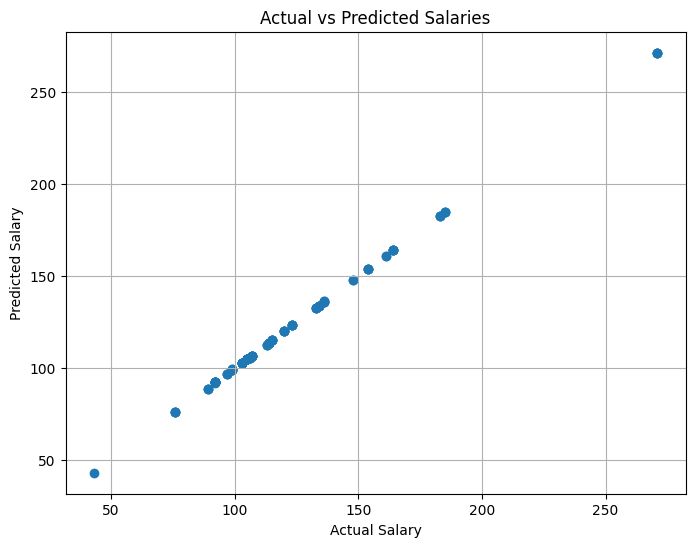

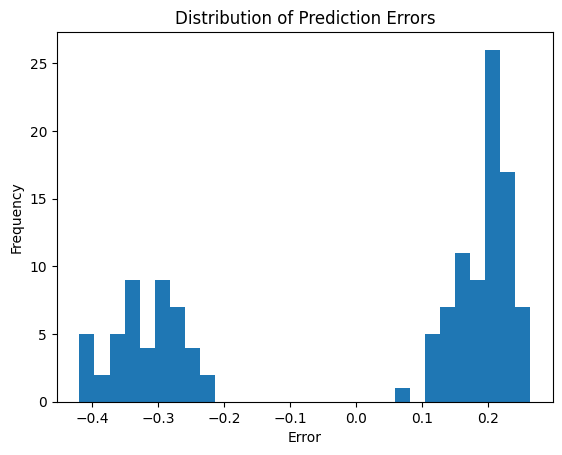

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features (X) and target (y)

# The target variable
target_column = (10, 'Avg_Salary')
y = df[target_column]


# # Use df.select_dtypes(include=np.number), To select numeric columns for Predictors.
X = df.select_dtypes(include=np.number).drop(columns=[target_column], errors='ignore')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model for predicting Avg_Salary using multiple features
model = LinearRegression()
model.fit(X_train, y_train)


coeffs = pd.DataFrame({ "Predictor": X.columns, "Coefficient": model.coef_})
print(coeffs)
intercept = model.intercept_
# If any of the predictors, such as company age has a negative coefficient:
# This means that older companies tend to offer slightly lower salaries,
# which may indicate that newer firms pay more competitively.

# And if any of the predictors,such as rating has a positive coefficient:
# This means a higher company rating increases the predicted salary.

# Evaluating Model Accuracy using R_Square
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")

#Analyzing for errors among predictions
errors = y_test - y_pred
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': errors})
print(df_errors.head())

# When error is LOW, good predictions are expected:
# Meaning the predictors align well
# It also means the model performs well for mid-range salaries and companies with predictable requirements,
# where rating and skills strongly explain pay levels.

#When error is HIGH, bad predictions are expected:
# Outliers indicates very high salaries
# It also indicates Missing or misreported values and Non-linear salary behavior
# It also explains that error increases for unusually high salaries and
# companies with unique compensation structures,
# suggesting that linear models struggle with extreme or non-linear salary patterns.


# Actual vs Predicted visual Plot for salary
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred) # The plot points close to the diagonal, which indicates a good predictions.
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.grid(True)
plt.show()


# Indicating where error is low or high, using visuals
plt.hist(errors, bins=30)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()




Cluster Centroids:
[[  3.62788018 111.90552995]
 [  3.59078947 179.375     ]
 [  3.91129032  69.5483871 ]]


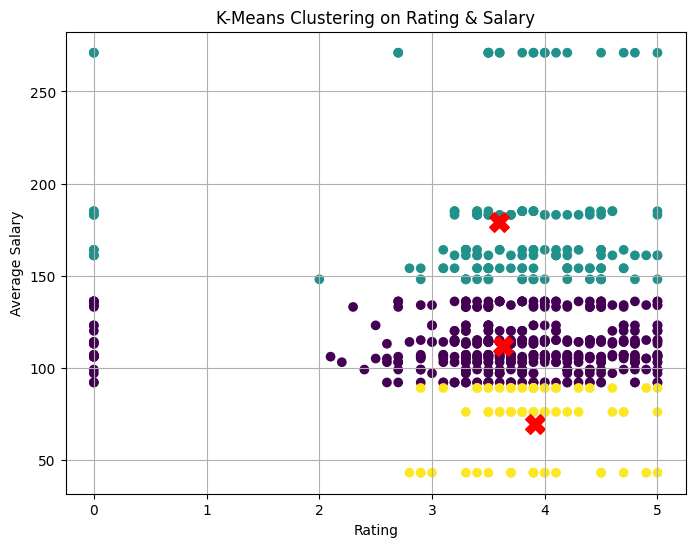

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

# Two features Used
X = df[[(2,'Rating'), (10,'Avg_Salary')]]

# K-Means clustering (k=3) using rating and average salary produced three distinct groups.
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Cluster centroids show clear separation: one cluster with low ratings and low salaries,
# another with moderate values, and a high-rating, high-salary cluster.
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

# Ploting derived results,
plt.figure(figsize=(8,6))
plt.scatter(df[(2,'Rating')], df[(10,'Avg_Salary')], c=df['cluster'], cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='red', marker='X')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.title('K-Means Clustering on Rating & Salary')
plt.grid(True)
plt.show()

# K-Means successfully grouped the jobs into distinct clusters based on salary and rating.
# The clusters represent meaningful patterns,
# where companies with higher ratings tend to offer higher salaries,
# and lower-rated companies cluster around lower salary ranges.


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


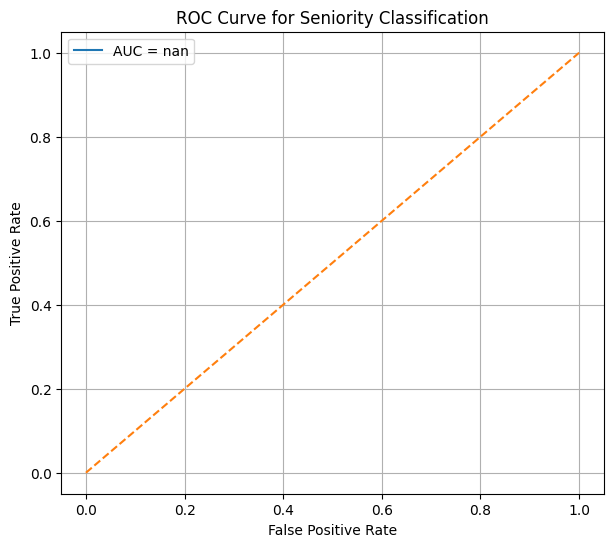

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# To perform binary classification (senior vs. junior), we need to include both classes.
# Filter for both 'jr' and 'senior' to ensure df2 is not empty and has multiple classes.
df2 = df[df[(21,'Seniority')].isin(['jr', 'senior'])].copy()

# Encode target
le = LabelEncoder()
# After filtering, df2 will contain 'jr' and 'senior' values.
# 'jr' will be encoded as 0 and 'senior' as 1 (or vice versa, depending on alphabetical order).
df2['seniority_label'] = le.fit_transform(df2[(21,'Seniority')])

# Select features
X = df2[[(10,'Avg_Salary'), (13,'Company_Age'), (2,'Rating')]]
y = df2['seniority_label']


# Stratification is not applicable when there is only one target class.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probability of 'senior' (assuming 'senior' is encoded as 1)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label='AUC = %.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')     # chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Seniority Classification")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Select only the skill columns (binary 0/1 columns)
skill_cols = [(14,'Python'),(19,'Tableau'),(17,'Spark'), (16,'Hadoop'), (18,'Aws'), (15,'Excel')]  # example

skills_df = df[skill_cols].astype(int)

freq_items = apriori(skills_df, min_support=0.05, use_colnames=True)
freq_items.head()

rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules.sort_values('confidence', ascending=False).head()



/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,"((19, Tableau), (16, Hadoop))","((14, Python))",0.058642,0.725309,0.057099,0.973684,1.342441,1.0,0.014565,10.438272,0.270979,0.078556,0.904199,0.526204
20,"((16, Hadoop), (18, Aws))","((14, Python))",0.089506,0.725309,0.084877,0.948276,1.307410,1.0,0.019957,5.310700,0.258243,0.116279,0.811701,0.532649
40,"((17, Spark), (15, Excel), (18, Aws))","((14, Python))",0.057099,0.725309,0.054012,0.945946,1.304198,1.0,0.012598,5.081790,0.247370,0.074153,0.803219,0.510207
29,"((17, Spark), (16, Hadoop), (18, Aws))","((14, Python))",0.080247,0.725309,0.075617,0.942308,1.299182,1.0,0.017414,4.761317,0.250377,0.103594,0.789974,0.523282
17,"((17, Spark), (18, Aws))","((14, Python))",0.120370,0.725309,0.112654,0.935897,1.290344,1.0,0.025349,4.285185,0.255804,0.153684,0.766638,0.545608


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
